The file ppg2008.csv contains data about basketball players from the year 2008.
It has various statistics on players in the NBA. You might not know what each
of the metrics means (I don't), but they are just different dimensions of data.  

Find and interpret clusters in this dataset. 



In [12]:
data <- read.csv("ppg2008.csv", header = TRUE) # read in data
head(data)

,Name,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,⋯,X3PA,X3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Dwyane Wade,79,38.6,30.2,10.8,22.0,0.491,7.5,9.8,0.765,⋯,3.5,0.317,1.1,3.9,5.0,7.5,2.2,1.3,3.4,2.3
2,LeBron James,81,37.7,28.4,9.7,19.9,0.489,7.3,9.4,0.780,⋯,4.7,0.344,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7
3,Kobe Bryant,82,36.2,26.8,9.8,20.9,0.467,5.9,6.9,0.856,⋯,4.1,0.351,1.1,4.1,5.2,4.9,1.5,0.5,2.6,2.3
4,Dirk Nowitzki,81,37.7,25.9,9.6,20.0,0.479,6.0,6.7,0.890,⋯,2.1,0.359,1.1,7.3,8.4,2.4,0.8,0.8,1.9,2.2
5,Danny Granger,67,36.2,25.8,8.5,19.1,0.447,6.0,6.9,0.878,⋯,6.7,0.404,0.7,4.4,5.1,2.7,1.0,1.4,2.5,3.1
6,Kevin Durant,74,39.0,25.3,8.9,18.8,0.476,6.1,7.1,0.863,⋯,3.1,0.422,1.0,5.5,6.5,2.8,1.3,0.7,3.0,1.8


I am going to apply the code from the notes to this data set and take a look at it. 

In [13]:
# kmeans
player_names <- data$Name  # Preserve the player names column

# Exclude the player names column
data_numeric <- data[, -1]  # Removes the player names, want only the metrics

# Scale the data
# Dont want the k means algorithm to depend on an arbitrary variable unit
data_scaled <- scale(data_numeric)

# Check scaled data
head(data_scaled)



G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,X3PM,X3PA,X3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
0.6179300,1.00197024,3.179941,2.9200222,2.596832,0.5136017,1.9174753,2.1107721,-0.7401673,-0.1080044,0.13036473,-0.15749098,-0.27213551,-0.34656760,-0.3287465,1.6522467,2.5582382,1.2064646,1.7904454,-0.2984568
0.7693834,0.61192992,2.566974,1.9571851,1.697237,0.4649190,1.7787289,1.8965892,-0.5233214,0.4920201,0.69716790,0.02738974,-0.06117775,1.00809403,0.6605370,1.5161473,1.3672521,0.8627425,1.0596514,-1.3903719
0.8451101,-0.03813728,2.022113,2.0447158,2.125615,-0.0705898,0.8075041,0.5579463,0.5753645,0.2520103,0.41376631,0.07532177,-0.27213551,-0.23367913,-0.2526478,0.4727186,0.8908576,-0.1684238,0.3288573,-0.2984568
0.7693834,0.61192992,1.715629,1.8696545,1.740075,0.2215059,0.8768773,0.4508549,1.0668818,-0.4680191,-0.53090563,0.13010124,-0.27213551,1.57253638,0.9649320,-0.6614431,-0.7765229,0.3471593,-0.9500323,-0.4804426
-0.2907906,-0.03813728,1.681575,0.9068174,1.354534,-0.5574160,0.8768773,0.5579463,0.8934051,1.8120740,1.64183984,0.43823576,-0.69405103,-0.06434643,-0.2906972,-0.5253437,-0.3001285,1.3783256,0.1461588,1.1574300
0.2392964,1.17532149,1.511307,1.2569400,1.226020,0.1484820,0.9462505,0.6650378,0.6765592,0.1320054,-0.05856966,0.56148957,-0.37761439,0.55654016,0.2419940,-0.4799772,0.4144632,0.1752983,1.0596514,-1.2083860


Used this website to help with kmeans in R

https://www.datanovia.com/en/lessons/k-means-clustering-in-r-algorith-and-practical-examples/

In [14]:
install.packages("factoextra")

Installing package into ‘/home/ttang1230/R/x86_64-pc-linux-gnu-library/4.4’
(as ‘lib’ is unspecified)



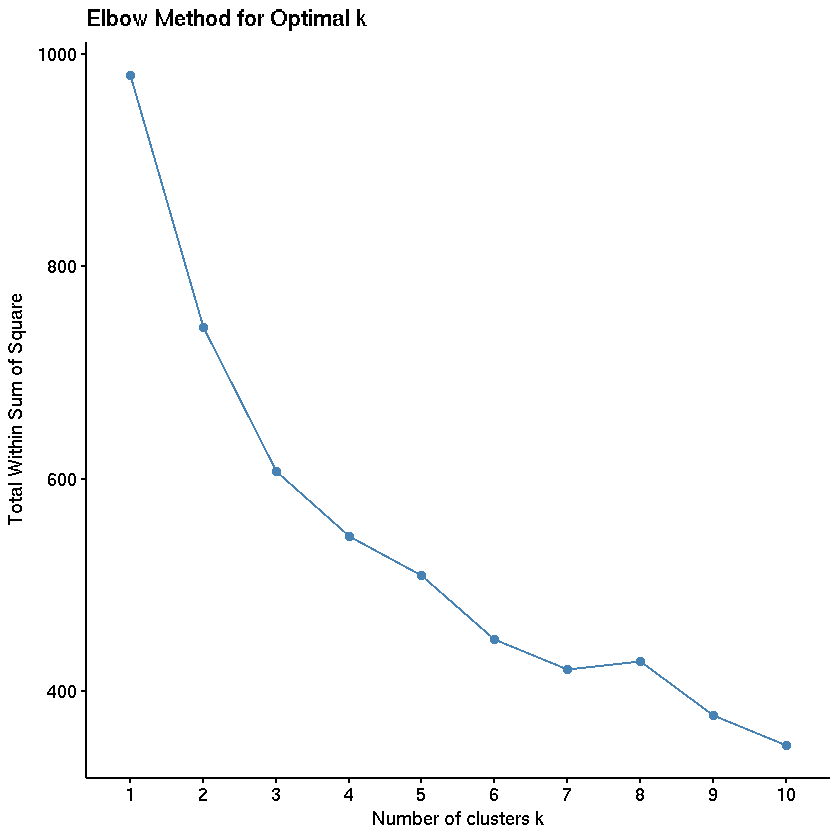

In [15]:
# use elbow method to find the k
library(factoextra)

# Visualize the optimal number of clusters
fviz_nbclust(data_scaled, kmeans, method = "wss") +
  labs(title = "Elbow Method for Optimal k")


6 or 7 clusters look like the elbow?

In [16]:
#lets choose 7 for k
set.seed(123)  # For reproducibility
k <- 7  

kmeans_result <- kmeans(data_scaled, centers = k, nstart = 25)  # Use multiple starts for better results

# Add the cluster assignments to the original data
data$cluster <- as.factor(kmeans_result$cluster)

# View cluster assignment for each players
head(data[, c("Name", "cluster")])


,Name,cluster
,<chr>,<fct>
1,Dwyane Wade,6
2,LeBron James,6
3,Kobe Bryant,6
4,Dirk Nowitzki,6
5,Danny Granger,6
6,Kevin Durant,6


In [17]:
# Summarize metrics by cluster
cluster_summary <- aggregate(data_numeric, by = list(Cluster = kmeans_result$cluster), mean)

# View the summary
print(cluster_summary) # Just to look


  Cluster        G      MIN      PTS      FGM      FGA       FGP      FTM
1       1 77.12500 35.93125 19.03125 6.737500 15.12500 0.4456875 3.618750
2       2 69.00000 37.30833 21.15000 7.250000 15.88333 0.4562500 5.566667
3       3 40.25000 33.75000 19.20000 6.950000 15.32500 0.4545000 4.275000
4       4 69.16667 37.40000 21.31667 8.283333 17.25000 0.4805000 4.333333
5       5 70.33333 35.83333 20.00000 7.433333 13.46667 0.5513333 5.066667
6       6 77.33333 37.56667 27.06667 9.550000 20.11667 0.4748333 6.466667
7       7 76.33333 33.16667 19.23333 7.100000 12.80000 0.5616667 5.000000
       FTA       FTP       X3PM       X3PA      X3PP       ORB      DRB
1 4.268750 0.8521875 1.93750000 5.02500000 0.3835625 0.8187500 3.281250
2 6.775000 0.8185000 1.09166667 3.12500000 0.3374167 0.9083333 3.733333
3 5.250000 0.8125000 1.00000000 2.97500000 0.3180000 0.8500000 3.700000
4 5.516667 0.7846667 0.40000000 1.18333333 0.2360000 2.7833333 6.516667
5 6.133333 0.8273333 0.03333333 0.03333333 0.643

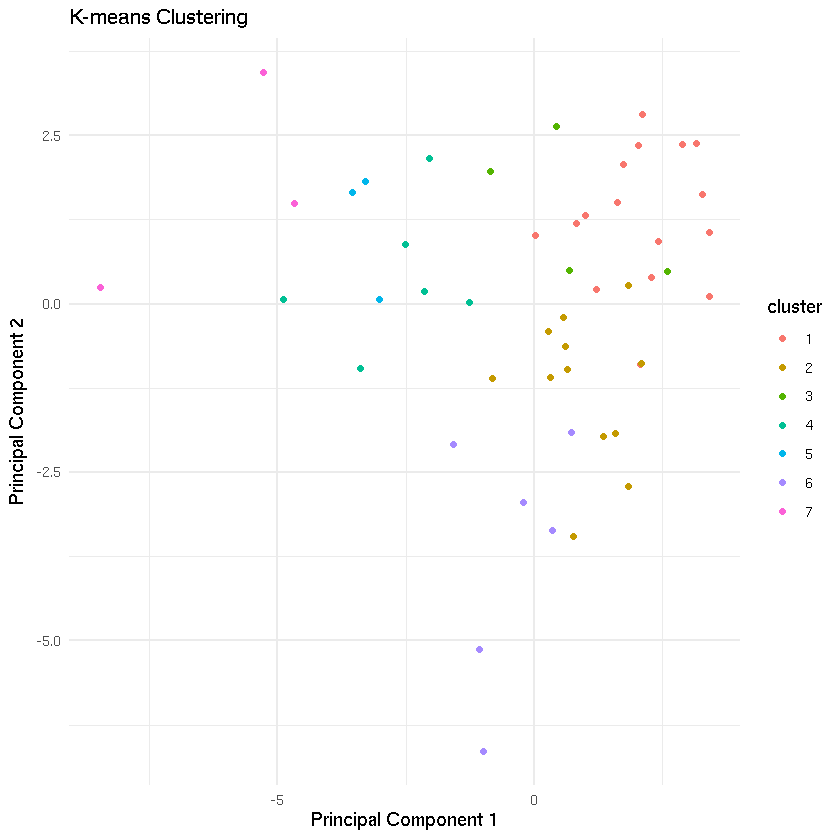

In [18]:
pca <- prcomp(data_scaled)  # Perform PCA
pca_data <- as.data.frame(pca$x)  # Extract principal components
pca_data$cluster <- as.factor(kmeans_result$cluster)  # Add cluster info

# Plot the clusters
library(ggplot2)
ggplot(pca_data, aes(x = PC1, y = PC2, color = cluster)) +
  geom_point() +
  labs(title = "K-means Clustering", x = "Principal Component 1", y = "Principal Component 2") +
  theme_minimal()


What if we did PCA first then kmeans, does it change anything?

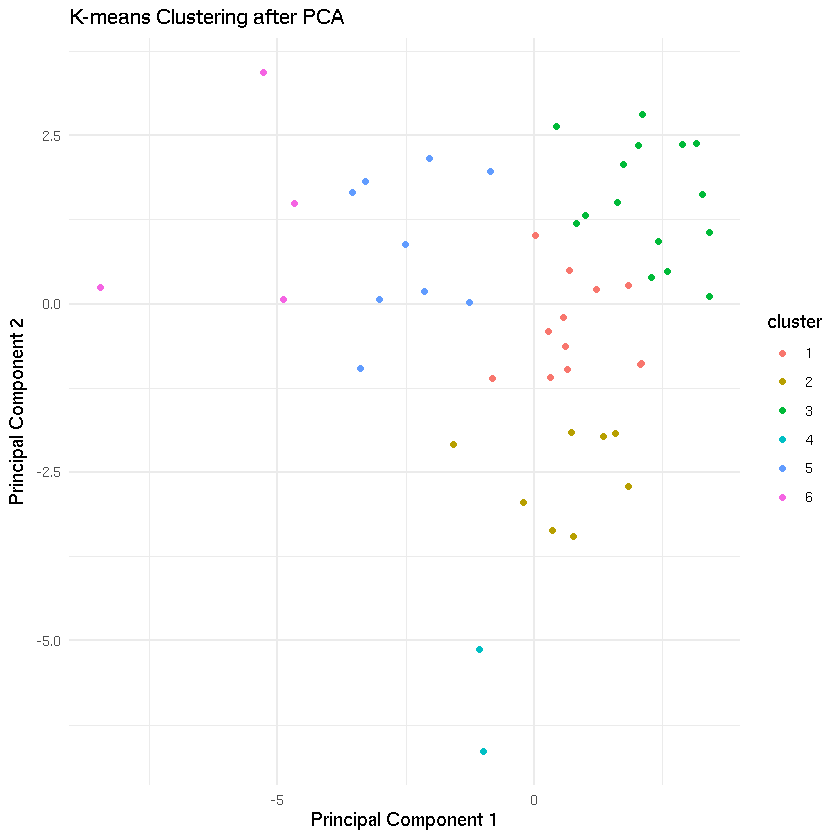

In [19]:
# Perform PCA
pca <- prcomp(data_scaled)  
pca_data <- as.data.frame(pca$x)  # Extract principal components

# Choose the top components (e.g., PC1 and PC2)
pca_subset <- pca_data[, 1:2]  # Adjust number of PCs as needed

# Run k-means on the reduced data
set.seed(123)
kmeans_result <- kmeans(pca_subset, centers = 6, nstart = 25)

# Add cluster assignments back to the PCA data
pca_data$cluster <- as.factor(kmeans_result$cluster)

# Plot the clusters
ggplot(pca_data, aes(x = PC1, y = PC2, color = cluster)) +
  geom_point() +
  labs(title = "K-means Clustering after PCA", x = "Principal Component 1", y = "Principal Component 2") +
  theme_minimal()


LDA is good to use when you have labels and want to evaluate how well the data is separated into classes

Call:
lda(cluster ~ ., data = data[, -1])

Prior probabilities of groups:
   1    2    3    4    5    6    7 
0.32 0.24 0.08 0.12 0.06 0.12 0.06 

Group means:
         G      MIN      PTS      FGM      FGA       FGP      FTM      FTA
1 77.12500 35.93125 19.03125 6.737500 15.12500 0.4456875 3.618750 4.268750
2 69.00000 37.30833 21.15000 7.250000 15.88333 0.4562500 5.566667 6.775000
3 40.25000 33.75000 19.20000 6.950000 15.32500 0.4545000 4.275000 5.250000
4 69.16667 37.40000 21.31667 8.283333 17.25000 0.4805000 4.333333 5.516667
5 70.33333 35.83333 20.00000 7.433333 13.46667 0.5513333 5.066667 6.133333
6 77.33333 37.56667 27.06667 9.550000 20.11667 0.4748333 6.466667 7.800000
7 76.33333 33.16667 19.23333 7.100000 12.80000 0.5616667 5.000000 8.000000
        FTP       X3PM       X3PA      X3PP       ORB      DRB       TRB
1 0.8521875 1.93750000 5.02500000 0.3835625 0.8187500 3.281250  4.081250
2 0.8185000 1.09166667 3.12500000 0.3374167 0.9083333 3.733333  4.625000
3 0.8125000 1.0000000

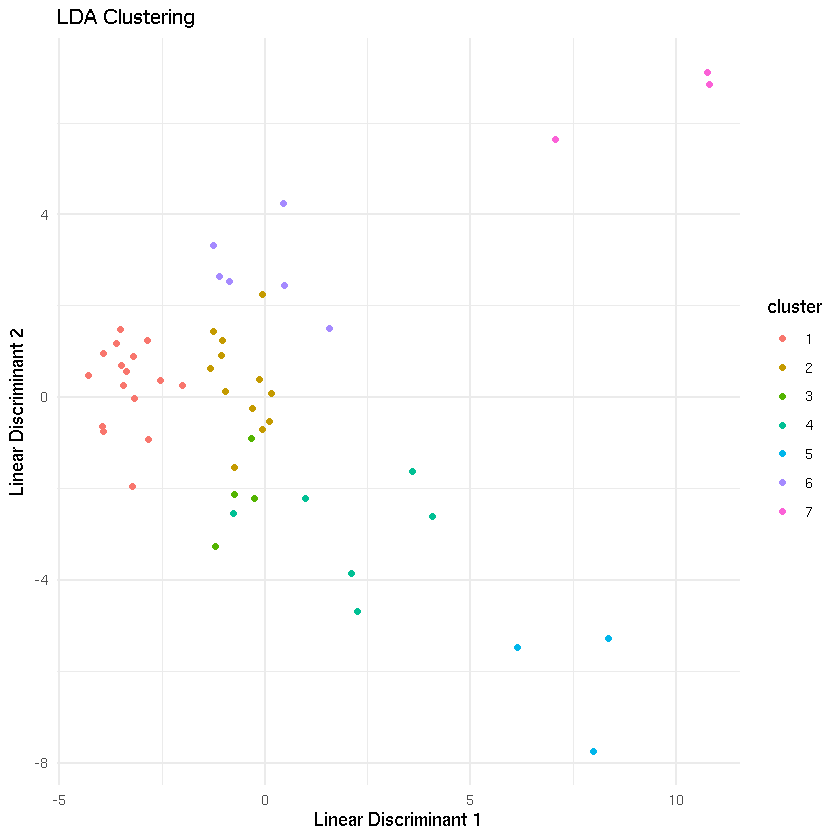

In [20]:
# LDA
# Load necessary library
library(MASS)

# Perform LDA
lda_result <- lda(formula = cluster ~ ., data = data[, -1])  # Exclude the 'Name' column
print(lda_result)

# Predict cluster assignments for the original data
lda_predictions <- predict(lda_result)
data$lda_cluster <- lda_predictions$class

# Visualize the LDA results (first two discriminants)
lda_data <- data.frame(lda_predictions$x)
lda_data$cluster <- as.factor(data$cluster)  # Add cluster info

ggplot(lda_data, aes(x = LD1, y = LD2, color = cluster)) +
  geom_point() +
  labs(title = "LDA Clustering", x = "Linear Discriminant 1", y = "Linear Discriminant 2") +
  theme_minimal()


[1] "Using perplexity: 15"
Performing PCA
Read the 50 x 20 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 15.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.00 seconds (sparsity = 0.965600)!
Learning embedding...
Iteration 50: error is 54.589990 (50 iterations in 0.00 seconds)
Iteration 100: error is 54.422640 (50 iterations in 0.00 seconds)
Iteration 150: error is 51.984679 (50 iterations in 0.00 seconds)
Iteration 200: error is 51.516635 (50 iterations in 0.00 seconds)
Iteration 250: error is 53.302465 (50 iterations in 0.00 seconds)
Iteration 300: error is 1.537732 (50 iterations in 0.00 seconds)
Iteration 350: error is 1.169163 (50 iterations in 0.00 seconds)
Iteration 400: error is 0.888771 (50 iterations in 0.00 seconds)
Iteration 450: error is 0.609162 (50 iterations in 0.00 seconds)
Iteration 500: error is 0.493167 (50 iterations in 0.00 seconds)
Fitting performed in 0.03 seconds.


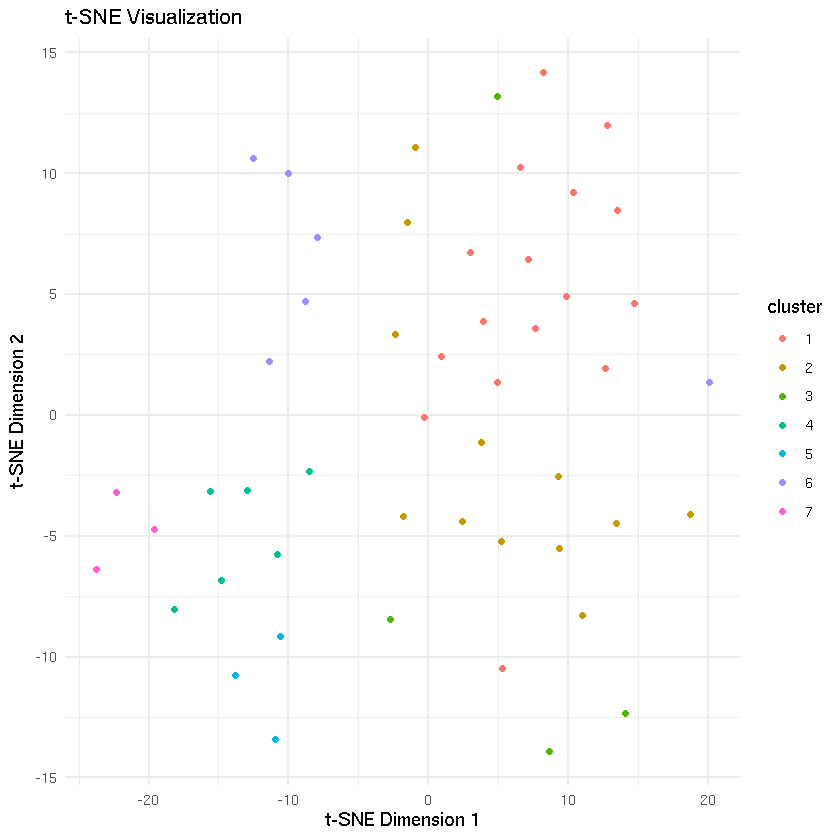

In [22]:
# Do tSNE
# Set perplexity based on the number of samples
n_samples <- nrow(data_scaled)  # Calculate the number of samples in the dataset
perplexity_value <- min(floor(n_samples / 3), 15)  # Use a safe value for small datasets
print(paste("Using perplexity:", perplexity_value))

library("Rtsne")
# Run t-SNE with adjusted perplexity
set.seed(123)  # For reproducibility
tsne_result <- Rtsne(data_scaled, dims = 2, perplexity = perplexity_value, verbose = TRUE, max_iter = 500)

# Prepare t-SNE data for visualization
tsne_data <- data.frame(tsne_result$Y)
colnames(tsne_data) <- c("tSNE1", "tSNE2")
tsne_data$cluster <- as.factor(data$cluster)  # Add cluster info

# Visualize t-SNE
library(ggplot2)
ggplot(tsne_data, aes(x = tSNE1, y = tSNE2, color = cluster)) +
  geom_point() +
  labs(title = "t-SNE Visualization", x = "t-SNE Dimension 1", y = "t-SNE Dimension 2") +
  theme_minimal()


**Different approach, the graphs above aren't giving me good information to work with**

I am not sure what to make of the clusters from above. I will do PCA then kmeans, and kmeans and tSNE like in the notes

Performing PCA
Read the 50 x 2 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 5.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.00 seconds (sparsity = 0.378400)!
Learning embedding...
Iteration 50: error is 62.982708 (50 iterations in 0.00 seconds)
Iteration 100: error is 62.552178 (50 iterations in 0.00 seconds)
Iteration 150: error is 65.406219 (50 iterations in 0.00 seconds)
Iteration 200: error is 59.031758 (50 iterations in 0.00 seconds)
Iteration 250: error is 59.172537 (50 iterations in 0.00 seconds)
Iteration 300: error is 2.242128 (50 iterations in 0.00 seconds)
Iteration 350: error is 1.517668 (50 iterations in 0.00 seconds)
Iteration 400: error is 0.990933 (50 iterations in 0.00 seconds)
Iteration 450: error is 0.480904 (50 iterations in 0.00 seconds)
Iteration 500: error is 0.447569 (50 iterations in 0.00 seconds)
Iteration 550: error is 0.412716 (50 iterations in 0.00 seconds)
Iteration 600: e

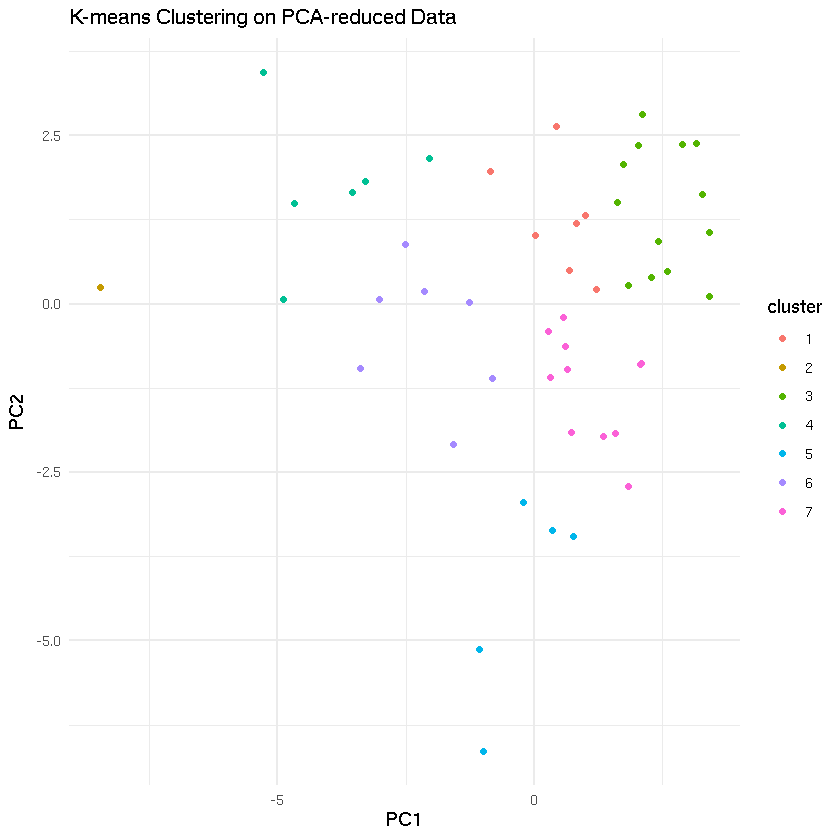

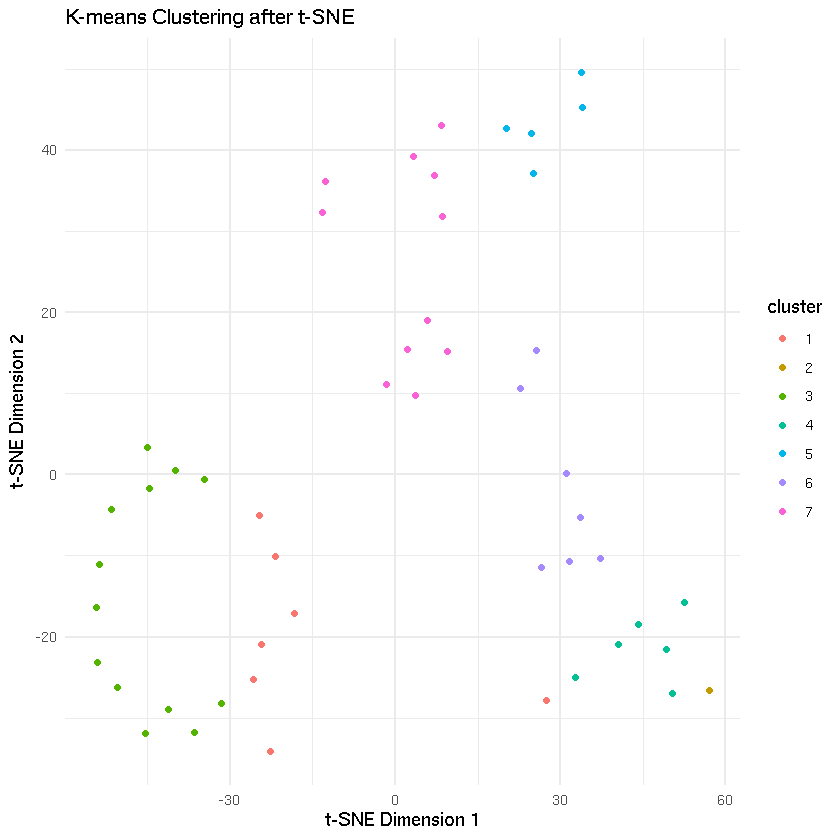

In [23]:
# Perform PCA
pca <- prcomp(data_scaled)  
pca_data <- as.data.frame(pca$x)  # Extract principal components

# Add player names to the PCA data
pca_data$player <- player_names  # Add the preserved player names

# Perform k-means clustering on the PCA data
set.seed(123) # for reproducibility
kmeans_result <- kmeans(pca_data[, 1:2], centers = 7, nstart = 25)

# Add cluster information
pca_data$cluster <- as.factor(kmeans_result$cluster)

# Create a data frame with player names and their cluster assignments
pca_cluster_df <- data.frame(player = pca_data$player, cluster = pca_data$cluster)

# Visualize the clusters in PCA
library(ggplot2)
ggplot(pca_data, aes(x = PC1, y = PC2, color = cluster, label = player)) +
  geom_point() +
  labs(title = "K-means Clustering on PCA-reduced Data", x = "PC1", y = "PC2") +
  theme_minimal()


# Alternatively use tSNE for visualization:
library(Rtsne)
tsne_result <- Rtsne(pca_data[, 1:2], dims = 2, perplexity = 5, verbose = TRUE)
tsne_data <- as.data.frame(tsne_result$Y)

# Add player names to the t-SNE data
tsne_data$player <- player_names  # Add the preserved player names

# Perform k-means clustering on the t-SNE data
tsne_data$cluster <- as.factor(kmeans_result$cluster)

# Create a data frame with player names and their cluster assignments from t-SNE
tsne_cluster_df <- data.frame(player = tsne_data$player, cluster = tsne_data$cluster)


# Visualize the clusters in t-SNE space 
ggplot(tsne_data, aes(x = V1, y = V2, color = cluster, label = player)) +
  geom_point() +
  labs(title = "K-means Clustering after t-SNE", x = "t-SNE Dimension 1", y = "t-SNE Dimension 2") +
  theme_minimal()


***These graphs look better***

In [24]:
# Convert the cluster column to numeric
pca_cluster_df$cluster <- as.numeric(as.character(pca_cluster_df$cluster))

# Order the pca_cluster_df by the cluster column in descending order
print('PCA Cluster')
pca_cluster_df <- pca_cluster_df[order(-pca_cluster_df$cluster), ]
print(pca_cluster_df) # easier visualization

cat("\n-----------------------------------\n") 

# Similarly, convert and order the tsne_cluster_df by cluster columns 
print('tSNE Cluster')
tsne_cluster_df$cluster <- as.numeric(as.character(tsne_cluster_df$cluster))
tsne_cluster_df <- tsne_cluster_df[order(-tsne_cluster_df$cluster), ]
print(tsne_cluster_df)


[1] "PCA Cluster"
               player cluster
5      Danny Granger        7
7       Kevin Martin        7
12       Brandon Roy        7
14       Tony Parker        7
16       Joe Johnson        7
17      Devin Harris        7
21      Caron Butler        7
23   Stephen Jackson        7
26       Paul Pierce        7
32    Deron Williams        7
37    Andre Iguodala        7
4      Dirk Nowitzki        6
10   Carmelo Anthony        6
11        Chris Bosh        6
13    Antawn Jamison        6
15  Amare Stoudemire        6
19        David West        6
20  Zachary Randolph        6
1        Dwyane Wade        5
2       LeBron James        5
3        Kobe Bryant        5
6       Kevin Durant        5
9         Chris Paul        5
8       Al Jefferson        4
29          Yao Ming        4
33        Tim Duncan        4
36         Pau Gasol        4
43 LaMarcus Aldridge        4
46  Shaquille O'neal        4
18      Michael Redd        3
24        Ben Gordon        3
28    Jamal Crawford  

The clustering is relatively well-defined in both PCA and t-SNE plots, with distinct groupings of points corresponding to different clusters. However, the t-SNE plot shows better separation between clusters than the PCA plot, which is common since t-SNE is designed to emphasize local relationships.

In the PCA plot, some clusters (e.g., clusters 4 and 7) overlap or have less distinct boundaries, suggesting possible difficulty in distinguishing them in the reduced feature space.
In contrast, the t-SNE plot shows tighter and more spatially distinct clusters, indicating better compactness and separation.

Both visualizations show clusters of varying sizes, with some clusters (e.g., cluster 5) appearing larger and more spread out compared to others (e.g., cluster 6), which are smaller and denser.


The differences in cluster structures between PCA and t-SNE highlight that t-SNE better preserves local structures, while PCA captures global variance. This explains why the t-SNE plot has more distinct, tightly grouped clusters.

From the graphs above it looks to boe that the t-SNE visualization is better for analyzing cluster relationships as it provides clearer separation between the clusters. Overlapping clusters in PCA suggest potential issues with feature representation or that some clusters are inherently similar in the PCA-reduced feature space.

[1] 50 20


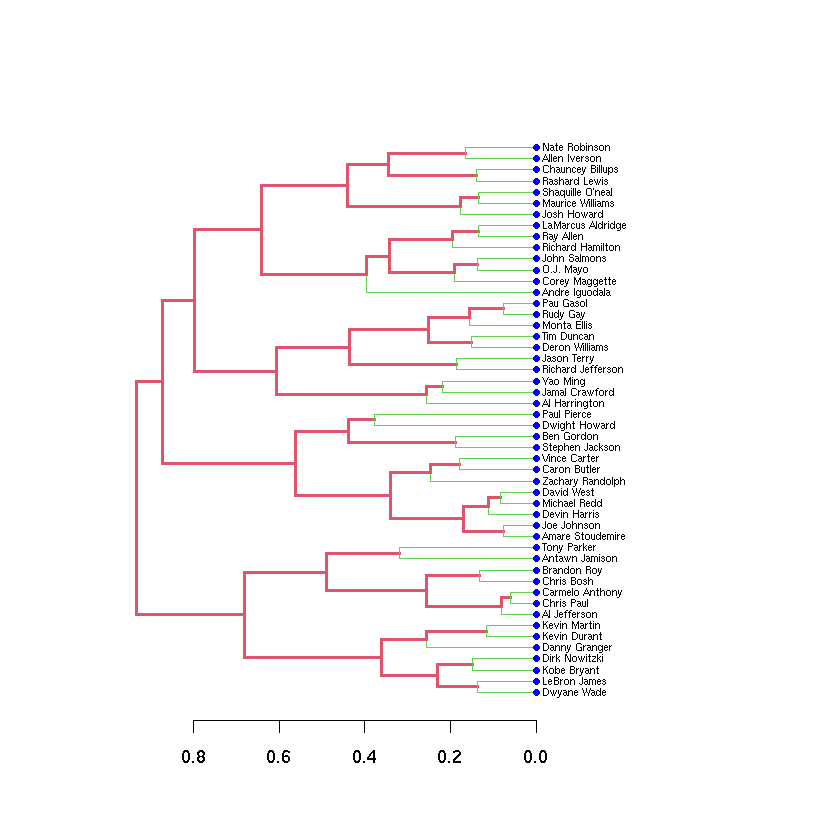

In [26]:
# Hierarchical, lets see what this gives us
# Read the data
data <- read.csv("ppg2008.csv", header = TRUE)

# Exclude the player names column (assuming it's the first column)
data_numeric <- data[, -1]
player_names <- data$Name  # Save the player names column

# Scale the data (so all metrics are on the same scale)
data_scaled <- scale(data_numeric)

# Check dimensions
print(dim(data_scaled))  # Ensure there are 50 rows and 20 columns 

# Compute the Spearman correlation between players (rows) by transposing the scaled data
cor_matrix <- cor(t(data_scaled), method = "spearman")  # Use t to transpose so its rows

# Create the distance matrix from the correlation matrix
dm <- as.dist((1 - cor_matrix) / 2)

# Perform hierarchical clustering using the complete linkage method
my_hclust_gene <- hclust(dm, method = "complete")

# Load the dendextend library for enhanced dendrogram visualization
library(dendextend)

# Customize the dendrogram plot to add player names at the ends of the branches
par(mar = c(5, 5, 5, 12))  # Adjust plot margins for better labeling

# Customize appearance of nodes and edges
nPar <- list(lab.cex = 0.6, pch = c(NA, 19), cex = 0.7, col = "blue")
ePar <- list(col = 2:3, lwd = 2:1)

# Convert hclust object into a dendrogram and set the player names as labels
dend <- as.dendrogram(my_hclust_gene)

# Assign player names to the labels
labels(dend) <- player_names  # Assign player names to the labels

# Plot the dendrogram with customized labels and appearance
plot(dend, nodePar = nPar, edgePar = ePar, horiz = TRUE)


From the hierarchical we can visually "cut" the tree to choose the number of clusters. For example, cutting at a certain height might suggest 7 clusters (consistent with the K-means clustering), but alternative cuts could reveal fewer or more clusters depending on the desired granularity. The dendogram shows a clear hierarchical organization where data points are progressively merged into clusters. The varying lengths of branches indicate differences in distances between clusters—longer branches suggest more dissimilar groups, while shorter branches represent closely related data points or clusters.

Both the dendrogram and K-means identified a similar number of clusters (7), suggesting some consistency between the hierarchical and partition-based clustering.
The dendrogram and K-means clustering (visualized in PCA and t-SNE plots) complement each other. While K-means gives a direct partitioning of the data, the dendrogram reveals hierarchical relationships and potential sub-clusters. Together, they suggest that the dataset has meaningful groupings, likely around 7 clusters, but the exact separability and cluster structure may depend on the method used and the inherent characteristics of the data.